In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Karen
[nltk_data]     Pinto\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG', 'FB']

In [3]:
news_tables = {}
for ticker in tickers:
    url = finviz_url + ticker

    req = Request(url=url, headers={'user-agent': 'my-app'}) # to get access from finviz
    response = urlopen(req)

    html = BeautifulSoup(response, features='html.parser') # will return the source code of that url page
    # from the source code, it is noticed that all the articles are stored in a table with the id=news-table
    # so lets access the whole table
    news_table = html.find(id='news-table') 
    news_tables[ticker] = news_table # so here we store the whole table in a dictionary with key 'ticker'


In [4]:
parsed_data = []

for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])

df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df1 = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
print(df)

    ticker       date       time  \
0     AMZN  Mar-28-22  08:18AM     
1     AMZN  Mar-28-22  07:45AM     
2     AMZN  Mar-28-22  06:10AM     
3     AMZN  Mar-28-22  05:58AM     
4     AMZN  Mar-28-22  05:52AM     
..     ...        ...        ...   
295     FB  Mar-18-22  04:40PM     
296     FB  Mar-18-22  03:18PM     
297     FB  Mar-18-22  01:45PM     
298     FB  Mar-18-22  12:00PM     
299     FB  Mar-18-22  11:54AM     

                                                 title  
0    Tesla Plans Another Stock Split, but This Tiny...  
1    Is Snowflake Stock A Buy Or Sell Amid Software...  
2    Apple's 'CODA' win at the Oscars could unleash...  
3    Why you should fear oil prices at $90, $100, $...  
4    3 Warren Buffett Stocks I'd Buy Without Any He...  
..                                                 ...  
295  Russian copycats are stealing intellectual pro...  
296  Stocks turn positive to end the week, led by m...  
297  McDonald's, Starbucks, and others have no reco...

In [5]:
vader = SentimentIntensityAnalyzer()

print (df['title'])

0      Tesla Plans Another Stock Split, but This Tiny...
1      Is Snowflake Stock A Buy Or Sell Amid Software...
2      Apple's 'CODA' win at the Oscars could unleash...
3      Why you should fear oil prices at $90, $100, $...
4      3 Warren Buffett Stocks I'd Buy Without Any He...
                             ...                        
295    Russian copycats are stealing intellectual pro...
296    Stocks turn positive to end the week, led by m...
297    McDonald's, Starbucks, and others have no reco...
298    Instagram users targeted for get-rich-quick in...
299    Instagram releases new parental supervisory to...
Name: title, Length: 300, dtype: object


In [6]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)

print(df)

    ticker       date       time  \
0     AMZN  Mar-28-22  08:18AM     
1     AMZN  Mar-28-22  07:45AM     
2     AMZN  Mar-28-22  06:10AM     
3     AMZN  Mar-28-22  05:58AM     
4     AMZN  Mar-28-22  05:52AM     
..     ...        ...        ...   
295     FB  Mar-18-22  04:40PM     
296     FB  Mar-18-22  03:18PM     
297     FB  Mar-18-22  01:45PM     
298     FB  Mar-18-22  12:00PM     
299     FB  Mar-18-22  11:54AM     

                                                 title  compound    pos  \
0    Tesla Plans Another Stock Split, but This Tiny...    0.0000  0.000   
1    Is Snowflake Stock A Buy Or Sell Amid Software...    0.0000  0.000   
2    Apple's 'CODA' win at the Oscars could unleash...    0.5859  0.275   
3    Why you should fear oil prices at $90, $100, $...   -0.4939  0.000   
4    3 Warren Buffett Stocks I'd Buy Without Any He...    0.2057  0.206   
..                                                 ...       ...    ...   
295  Russian copycats are stealing intelle

In [7]:
f = lambda title: vader.polarity_scores(title)['compound']

df['compund'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

f1 = lambda title: vader.polarity_scores(title)['neu']
df1['neu'] = df1['title'].apply(f1)
df1['date'] = pd.to_datetime(df.date).dt.date

<Figure size 720x576 with 0 Axes>

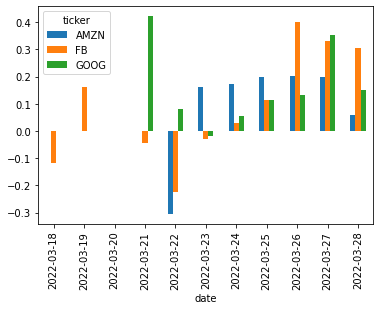

In [8]:
plt.figure(figsize=(10,8))
mean_df = df.groupby(['ticker','date']).mean()
mean_df = mean_df.unstack()
mean_df = mean_df.xs('compound',axis='columns').transpose()
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

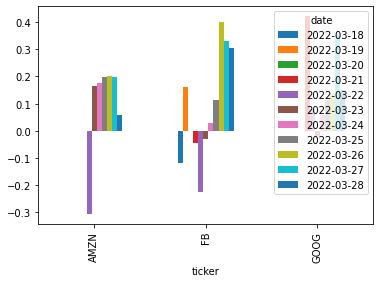

In [9]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns")
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

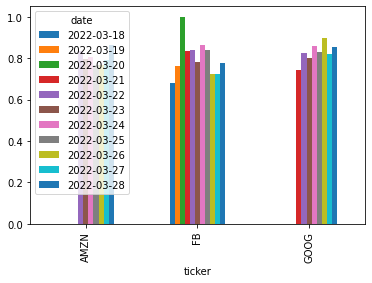

In [10]:
plt.figure(figsize=(20,10))
mean_df1 = df1.groupby(['ticker', 'date']).mean().unstack()
mean_df1.head()
mean_df1 = mean_df1.xs('neu', axis="columns")
mean_df1.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

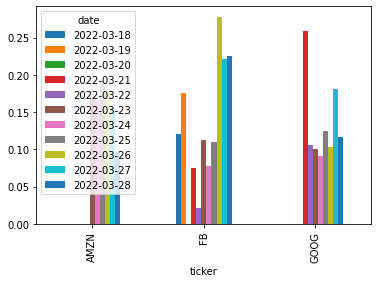

In [11]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('neg', axis="columns")
mean_df.plot(kind='bar')
plt.show()

<Figure size 1440x720 with 0 Axes>

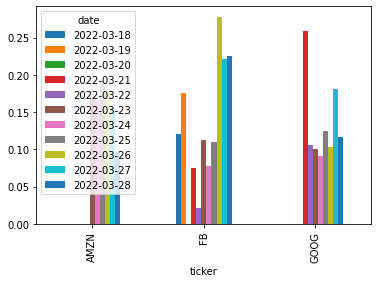

In [12]:
plt.figure(figsize=(20,10))
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('pos', axis="columns")
mean_df.plot(kind='bar')
plt.show()

In [13]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
f2 = lambda title: vader.polarity_scores(title)['pos']
df['pos'] = df['title'].apply(f2)
f3 = lambda title: vader.polarity_scores(title)['neg']
df['neg'] = df['title'].apply(f2)
f4 = lambda title: vader.polarity_scores(title)['neu']
df['neu'] = df['title'].apply(f2)

print(df)


    ticker        date       time  \
0     AMZN  2022-03-28  08:18AM     
1     AMZN  2022-03-28  07:45AM     
2     AMZN  2022-03-28  06:10AM     
3     AMZN  2022-03-28  05:58AM     
4     AMZN  2022-03-28  05:52AM     
..     ...         ...        ...   
295     FB  2022-03-18  04:40PM     
296     FB  2022-03-18  03:18PM     
297     FB  2022-03-18  01:45PM     
298     FB  2022-03-18  12:00PM     
299     FB  2022-03-18  11:54AM     

                                                 title  compound    pos  \
0    Tesla Plans Another Stock Split, but This Tiny...    0.0000  0.000   
1    Is Snowflake Stock A Buy Or Sell Amid Software...    0.0000  0.000   
2    Apple's 'CODA' win at the Oscars could unleash...    0.5859  0.275   
3    Why you should fear oil prices at $90, $100, $...   -0.4939  0.000   
4    3 Warren Buffett Stocks I'd Buy Without Any He...    0.2057  0.206   
..                                                 ...       ...    ...   
295  Russian copycats are stea